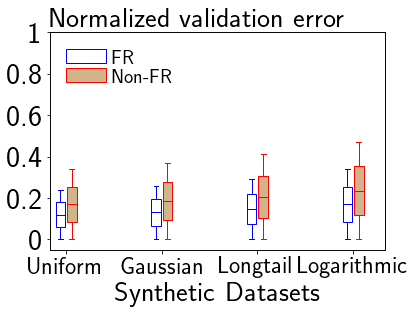

In [9]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
from matplotlib import rc
import matplotlib
import math

def cost(k, alpha=1, ratio=True):
    cost = k**(alpha)
#     cost = k * alpha / (1 + math.e**(-k*alpha))
#     if cost < 1: cost = 1
    return 1 - 1/cost

def draw_plot(ax, data, edge_color='black', fill_color='none', *args, **kwargs):
    bp = ax.boxplot(data, patch_artist=True, *args, **kwargs)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

#     plt.setp(bp['medians'], color=fill_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
    return bp

def customized_box_plot(percentiles, axes, xvalues=[-9, -4, 2, 4, 9], redraw = True, *args, **kwargs):
    """
    Generates a customized boxplot based on the given percentile values.
    https://stackoverflow.com/questions/27214537/is-it-possible-to-draw-a-matplotlib-boxplot-given-the-percentile-values-instead
    """

    n_box = len(percentiles)
    box_plot = axes.boxplot([xvalues,]*n_box, *args, **kwargs)
    # Creates len(percentiles) no of box plots

    min_y, max_y = float('inf'), -float('inf')

    for box_no, (q1_start, 
                 q2_start,
                 q3_start,
                 q4_start,
                 q4_end,
                 fliers_xy) in enumerate(percentiles):

        # Lower cap
        box_plot['caps'][2*box_no].set_ydata([q1_start, q1_start])
        # xdata is determined by the width of the box plot

        # Lower whiskers
        box_plot['whiskers'][2*box_no].set_ydata([q1_start, q2_start])

        # Higher cap
        box_plot['caps'][2*box_no + 1].set_ydata([q4_end, q4_end])

        # Higher whiskers
        box_plot['whiskers'][2*box_no + 1].set_ydata([q4_start, q4_end])

        # Box
        box_plot['boxes'][box_no].set_ydata([q2_start, 
                                             q2_start, 
                                             q4_start,
                                             q4_start,
                                             q2_start])

        # Median
        box_plot['medians'][box_no].set_ydata([q3_start, q3_start])

        # Outliers
        if fliers_xy is not None and len(fliers_xy[0]) != 0:
            # If outliers exist
            box_plot['fliers'][box_no].set(xdata = fliers_xy[0],
                                           ydata = fliers_xy[1])

            min_y = min(q1_start, min_y, fliers_xy[1].min())
            max_y = max(q4_end, max_y, fliers_xy[1].max())

        else:
            min_y = min(q1_start, min_y)
            max_y = max(q4_end, max_y)

        # The y axis is rescaled to fit the new box plot completely with 10% 
        # of the maximum value at both ends
        axes.set_ylim([min_y*0.9, max_y*1.1])

    # If redraw is set to true, the canvas is updated.
    if redraw:
        ax.figure.canvas.draw()

    return box_plot

# percentiles = [
# [0.56792473, 0.8, 0.9, 0.95, 1, None],
# [0.56792473, 0.8*(1-0.03), 0.88*(1-0.03), 0.95*(1-0.03), 1, None],
# [0.56792473, 0.8*(1-0.11), 0.9*(1-0.11), 0.95*(1-0.11), 1, None],
# [0.56792473, 0.8*(1-0.19), 0.9*(1-0.19), 0.95*(1-0.19), 1, None],
# [0.56792473, 0.8*(1-0.27), 0.9*(1-0.27), 0.95*(1-0.27), 1, None],
# ]
efforts1 = [
np.arange(0,25,1),
np.arange(0,1.07*25,1),
np.arange(0,1.19*25,1),
np.arange(0,1.37*25,1),
]
efforts2 = [
np.arange(0,35,1),
np.arange(0,35*1.07,1),
np.arange(0,35*1.19,1),
np.arange(0,35*1.37,1),
]

x=np.array([0,30,60,90])


matplotlib.rcParams.update({'font.size': 30})
matplotlib.rcParams['text.usetex'] = True

ax = plt.subplot(1,1,1)

width=3

# customized_box_plot(percentiles, ax, redraw=True, positions=x, notch=0, sym='+', vert=True, whis=1.5, widths=5)
bp1 = draw_plot(ax, efforts1, edge_color='blue', fill_color='none', positions=x-width*0.6, widths=width)
bp2 = draw_plot(ax, efforts2, edge_color='red', fill_color='tan', positions=x+width*0.6, widths=width)
# ax.text(x[0]-2, 50, 'k=1', fontsize=20, rotation=90)
# ax.text(x[1]-2, 60, 'k=2', fontsize=20, rotation=90)
# ax.text(x[2]-2, 70, 'k=5', fontsize=20, rotation=90)
# ax.text(x[3]-2, 80, 'k=10', fontsize=20, rotation=90)

ax.set_xlabel("Synthetic Datasets", fontsize=28) #fontsize=18
# ax.set_ylabel("Normalized val loss", fontsize=28)
ax.set_title('Normalized validation error', loc='left', color='black', fontsize=28)
ax.set_xlim([-5,100])
# ax.set_ylim([0.56792473, 1.05])
ax.set_ylim([-5, 100])
# ax.set_yticks(np.arange(0.4,1.01,0.1))
ax.set_yticks(np.arange(0,101,20))
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
ax2 = ax.twinx()
ax2.set_xticks([0,30,60,90])
# ax.set_xticklabels(['{:.0f}'.format(t) for t in ax.get_xticks()])
ax.set_xticklabels(['Uniform', 'Gaussian','Longtail','Logarithmic'], fontsize=24)
ax2.set_ylim([-0.15, 1.12])
ax2.set_yticks(np.arange(0,1.01,2))
ax2.set_ylabel("Normalized validation loss", fontsize=28)
ax2.get_yaxis().set_visible(False)

ax.legend([bp1["boxes"][0],bp2["boxes"][0]], [r'FR',r'Non-FR'], fontsize=20, loc='upper left', frameon=False, ncol=1, labelspacing=0, columnspacing=0.4, borderpad = 0.3, handletextpad=0.3)

# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width, box.height*0.9])

dir = "../tex/figures/"
plt.savefig(dir + "correctness_validation_synthetic.png", bbox_inches='tight', dpi=300)
#show()

{'boxes': [<matplotlib.lines.Line2D at 0x111963e90>],
 'caps': [<matplotlib.lines.Line2D at 0x111bb7d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x111bba090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x111bc1a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111bb7050>,
  <matplotlib.lines.Line2D at 0x111bb7710>]}

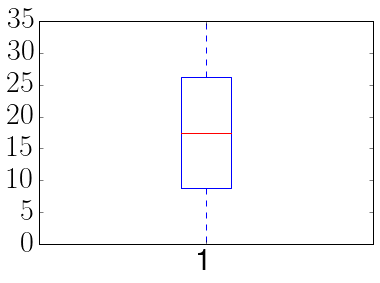

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# fake up some data
data = np.arange(0,36,1)

# basic plot
plt.boxplot(data)